# Lesson 28: Practice with hacker stats

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l28_practice_with_hackerstats.ipynb).*

In [1]:
import numpy as np

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Practice 1: Writing a function to draw bootstrap replicates

As you can imagine, it is quite useful to be able to generate, or "draw," bootstrap replicates. We wrote `for` loops to generate bootstrap replicates in the previous lesson. Now, you will write a function, `draw_bs_reps()` to do this automatically. You will include this function in your `~/git/bootcamp/bootcamp_utils.py` module.

>1. Define a function with call signature `draw_bs_reps(data, func, size=1)`, where `func` is a function that takes in an array and returns a statistic. Examples that could be passed in as `func` are `np.mean`, `np.std`, `np.median`, or a user-defined function. `size` is the number of replicates to generate.
2. Write a good doc string.
3. Define `n` to be the length of the input `data` array.
4. Initialize the array of replicates, `reps`, using `np.empty()`.
5. Write a **`for`** loop that does the following:
    * Draw a bootstrap sample using `np.random.choice()`.
    * Applied `func` to the bootstrap sample to compute the replicate. The replicate is stored in the `reps` array.
6. Return the `reps` array.

Now that you have the function, feel free to play around with it and compute bootstrap replicates with the finch beak or other data you want to play with.

### Solution 1

I show the function below.

In [4]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates from a data set."""
    n = len(data)
    
    # Initialize array of replicates
    reps = np.empty(size)
    
    for i in range(size):
        # Generate bootstrap sample
        bs_sample = np.random.choice(data, n)
        
        # Compute replicate
        reps[i] = func(bs_sample)
        
    return reps

Let's try this function out on the beak depth data from 1975 to get bootstrap replicates of the mean.

In [7]:
bd_1975 = np.loadtxt('data/beak_depth_scandens_1975.csv')

# Compute replicates
bs_replicates = draw_bs_reps(bd_1975, np.mean, size=100000)

# 95% confidence interval
print(np.percentile(bs_replicates, [2.5, 97.5]))

[ 8.84402299  9.07988506]


Nice!

## Practice 2: Plot ECDFs of bootstrap samples

To help you visualize how bootstrap samples can show what you might expect by repeating experiments, we will make a plot of ECDFs of lots of bootstrap samples.

>1. Load in the beak depth data from 1975.
2. Generate the `x` and `y` values for the ECDF of the data and plot them as before. You should use the `ecdf()` function you already wrote. When you make the plot, use the `color='blue'` kwarg of `plt.plot()`.
3. Write a **`for`** loop to do the following 100 times:
    * Generate a bootstrap sample from the data set using `np.random.choice()`.
    * Compute the `x` and `y` values for the ECDF of the bootstrap sample.
    * Use `plt.plot()` with kwargs `color='blue'` and `alpha=0.01` to display the ECDF ofr the bootstrap sample.
4. Label the axes and set 2% margins.

### Solution 2

I proceed to do the calculation with the data already loaded.

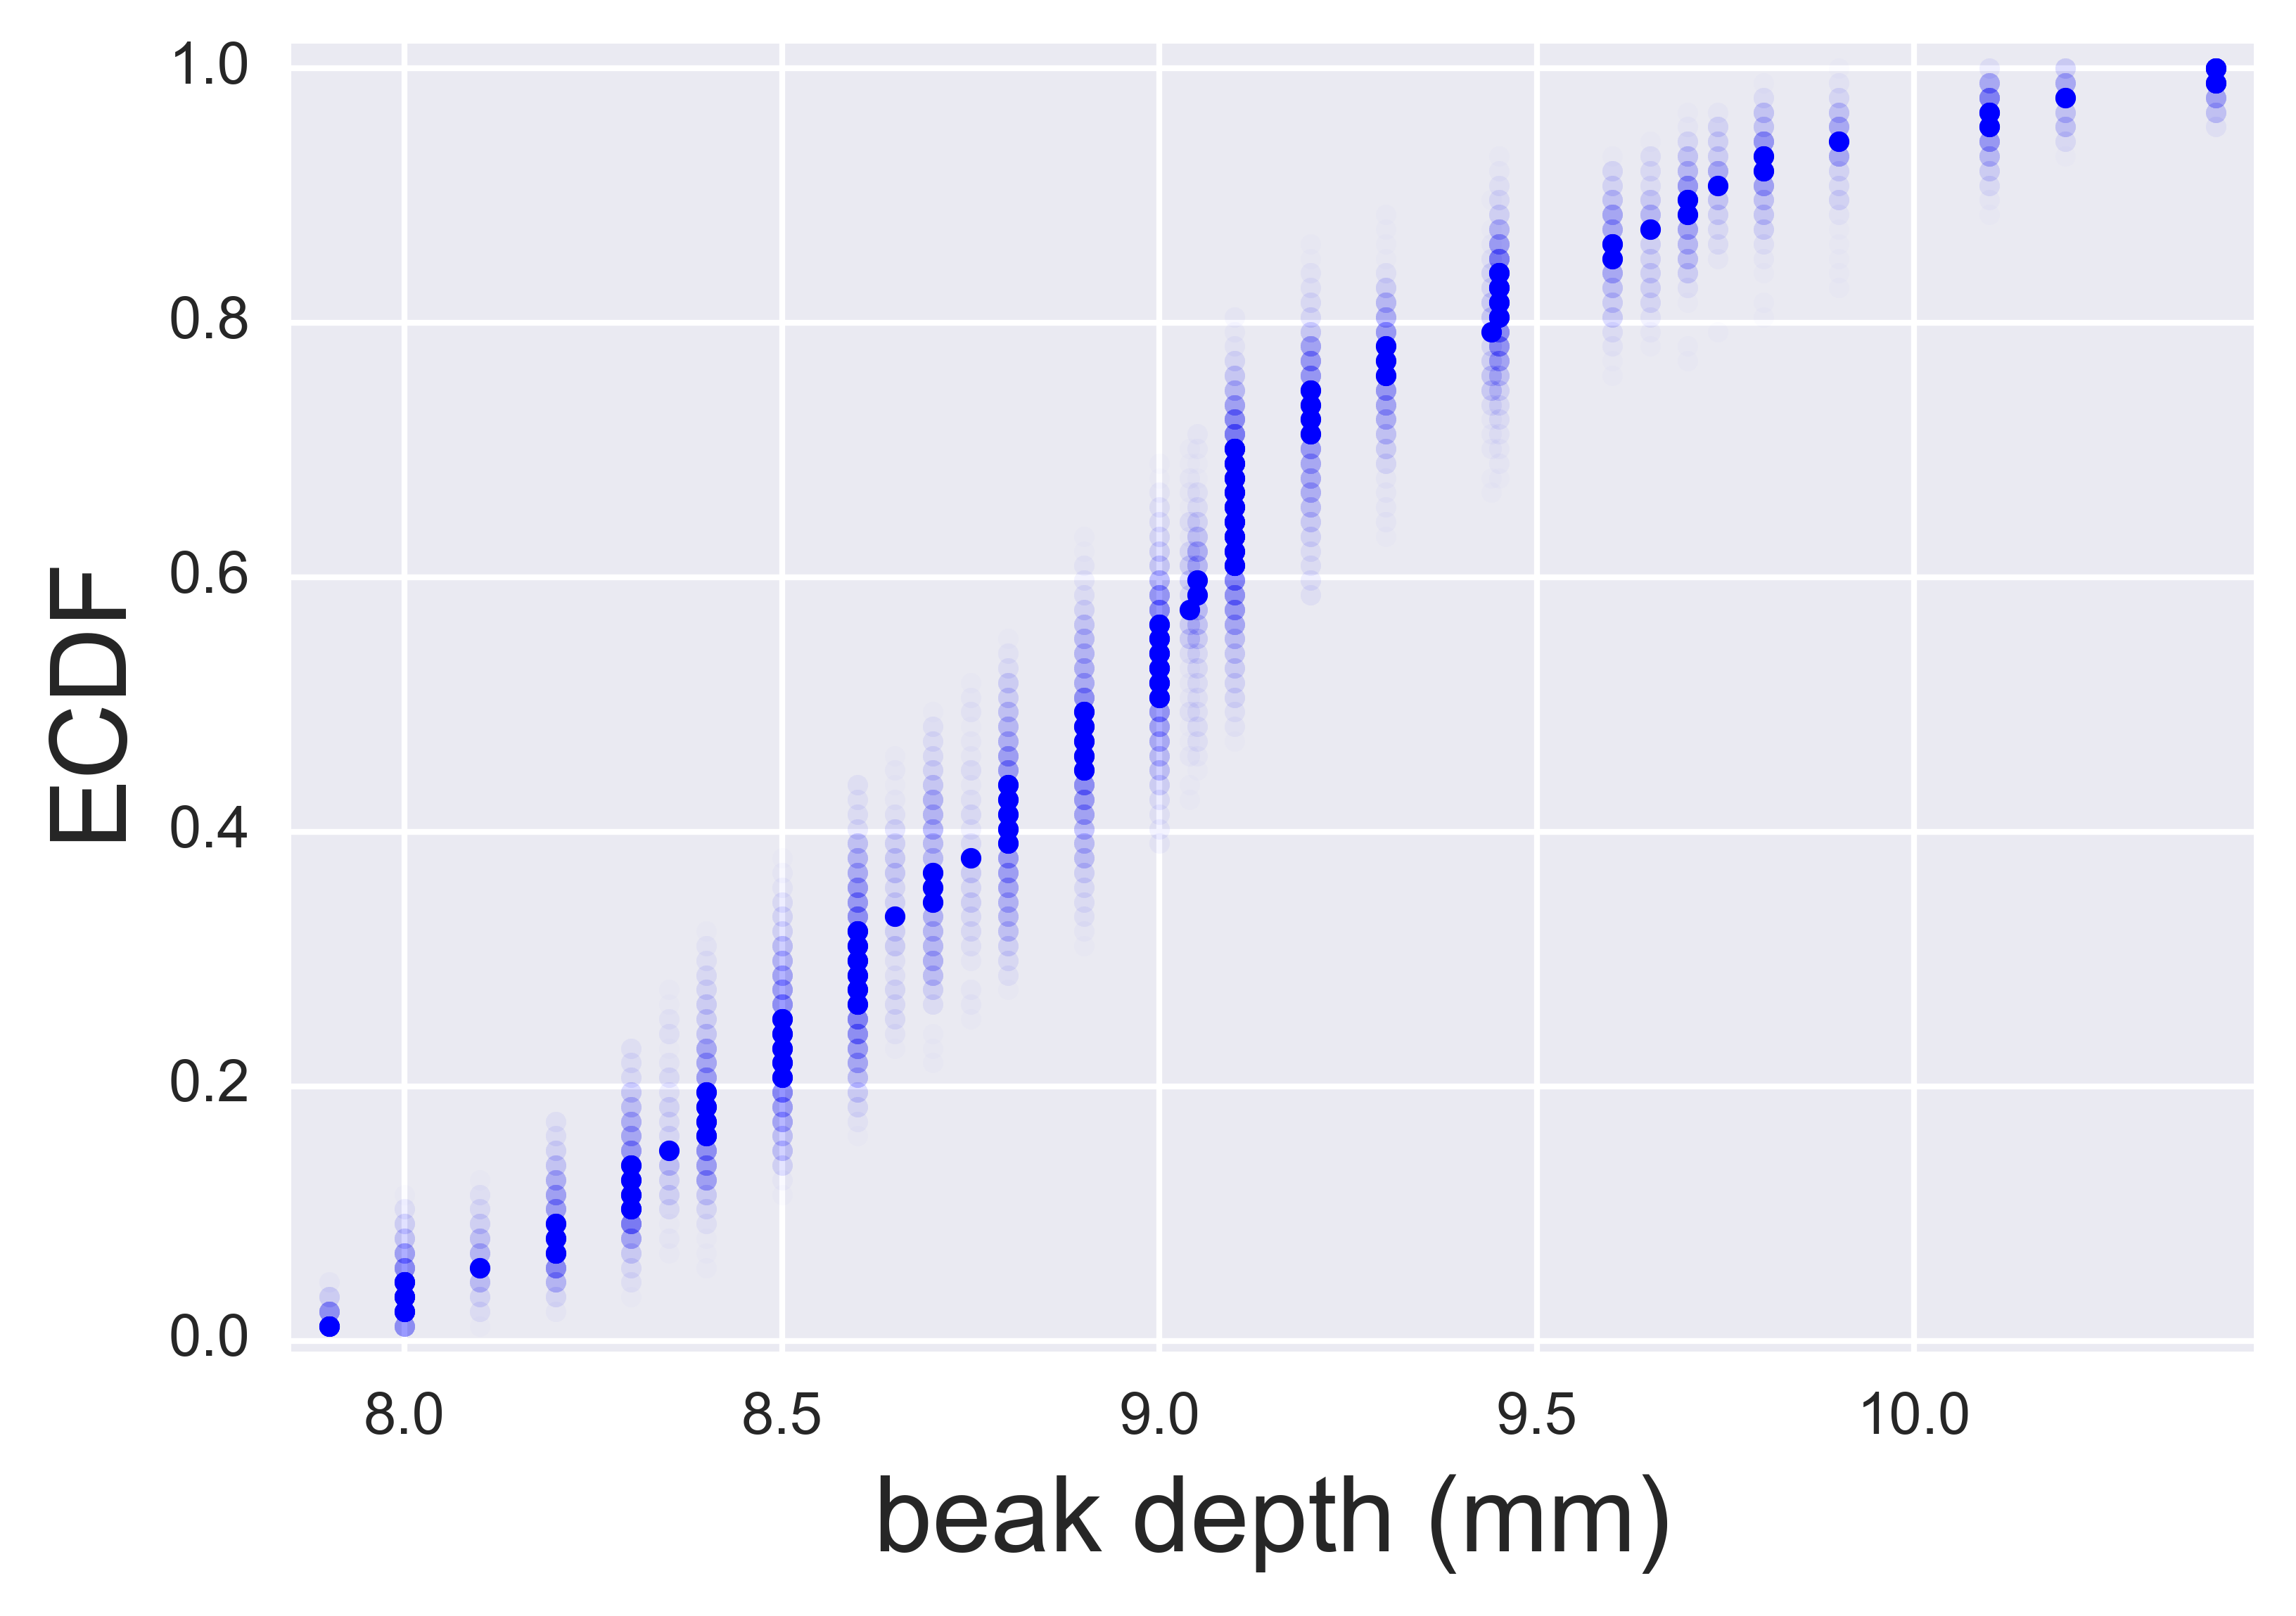

In [18]:
# Define ECDF function so we have it
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

# Compute ECDF of real data
x, y = ecdf(bd_1975)

# Plot its ECDF
plt.plot(x, y, marker='.', linestyle='none', color='blue')

# Plot a bunch of bootstrap samples
for _ in range(100):
    # Generate bootstrap sample
    bs_sample = np.random.choice(bd_1975, len(bd_1975))
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='blue', alpha=0.01)
    
# Label axes and set margins
plt.margins(0.02)
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')

The vertical width of the plot shows the kind of variation you might expect if you were to repeat the measurements again and again.